In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings 


In [60]:
df=pd.read_csv("C:\\Users\\pradyumn\\Documents\\Assignment\\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [62]:
df.rename( columns={'Unnamed: 0':'States'}, inplace=True )

In [63]:
df1=df.iloc[:,1:]

In [64]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [65]:
df_norm = norm_func(df1.iloc[:,:])
df_norm 

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


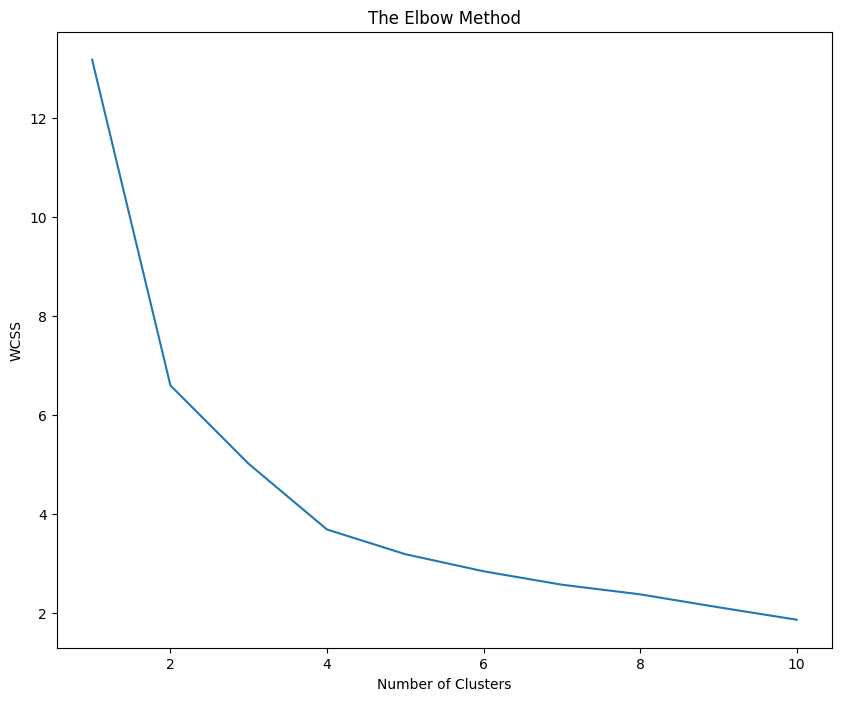

In [66]:
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [67]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)
y_kmeans

array([0, 0, 2, 4, 2, 2, 3, 4, 2, 0, 3, 1, 2, 4, 1, 4, 4, 0, 1, 2, 3, 2,
       1, 0, 4, 4, 1, 2, 1, 3, 2, 2, 0, 1, 3, 4, 4, 3, 3, 0, 1, 0, 2, 3,
       1, 4, 3, 1, 1, 4])

In [68]:
#clf.cluster_centers_
clf.labels_ 

array([0, 0, 2, 4, 2, 2, 3, 4, 2, 0, 3, 1, 2, 4, 1, 4, 4, 0, 1, 2, 3, 2,
       1, 0, 4, 4, 1, 2, 1, 3, 2, 2, 0, 1, 3, 4, 4, 3, 3, 0, 1, 0, 2, 3,
       1, 4, 3, 1, 1, 4])

In [69]:
clf.cluster_centers_ 

array([[0.80045181, 0.7114726 , 0.36440678, 0.44541344],
       [0.12212486, 0.09589041, 0.33898305, 0.10641297],
       [0.6177437 , 0.75031133, 0.798151  , 0.65421658],
       [0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.38663746, 0.36861768, 0.5146379 , 0.33004463]])

In [70]:
clf.inertia_

3.2295421446030925

In [71]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
df1['clust']=md # creating a  new column and assigning it to new column 
df1

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,4
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,4
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [72]:
df1.groupby(df1.clust).mean() 

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,14.087500,252.750000,53.500000,24.537500
1,2.827273,73.000000,52.000000,11.418182
2,11.054545,264.090909,79.090909,32.618182
3,4.955556,125.444444,80.111111,17.788889
4,7.218182,152.636364,62.363636,20.072727


In [73]:
WCSS

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859143,
 3.1842618139677232,
 2.8384866349053732,
 2.5668694324406993,
 2.3719938699535064,
 2.110593189826537,
 1.8586201182248687]

# KMeans visualization

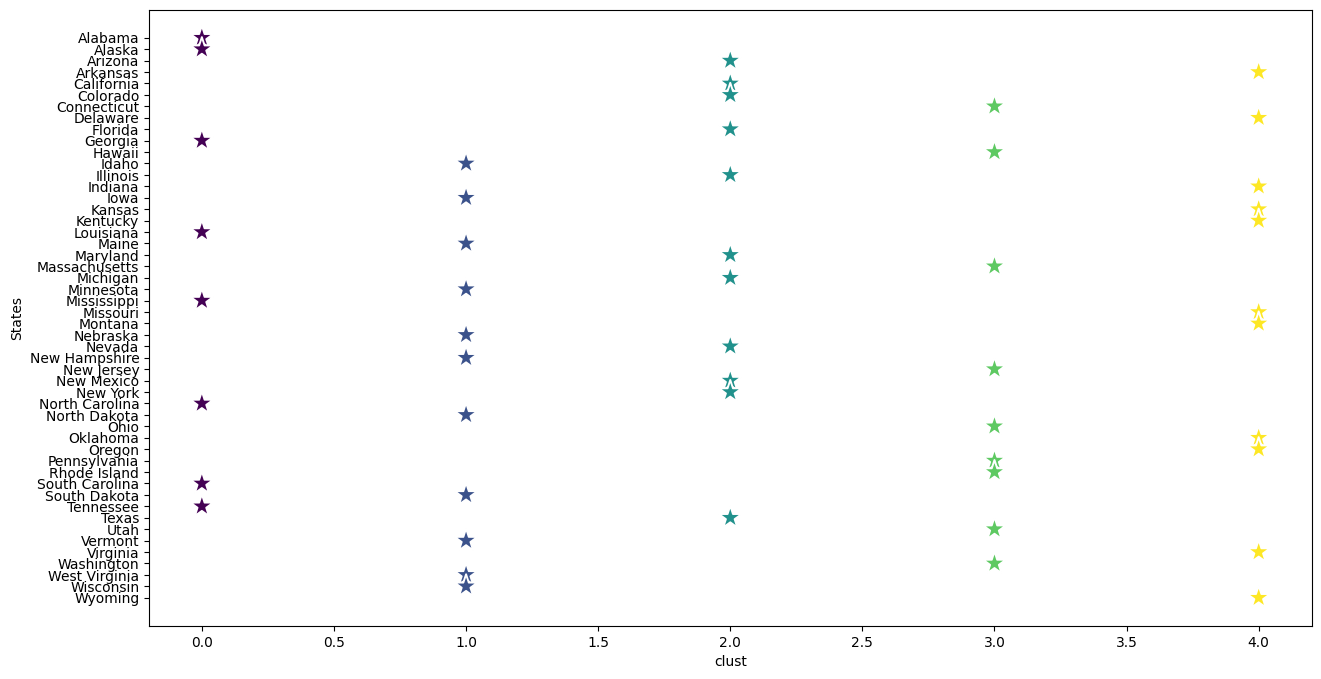

In [74]:
plt.figure(figsize=(15,8))
sn.scatterplot(x=df1['clust'],y=df['States'],c=clf.labels_,s=300,marker='*')
plt.show();

# DBSCAN Clustering

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [76]:
array=df1.values
array 

array([[ 13.2, 236. ,  58. ,  21.2,   0. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ],
       [  8.1, 294. ,  80. ,  31. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   4. ],
       [  9. , 276. ,  91. ,  40.6,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   2. ],
       [  3.3, 110. ,  77. ,  11.1,   3. ],
       [  5.9, 238. ,  72. ,  15.8,   4. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   3. ],
       [  2.6, 120. ,  54. ,  14.2,   1. ],
       [ 10.4, 249. ,  83. ,  24. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   4. ],
       [  2.2,  56. ,  57. ,  11.3,   1. ],
       [  6. , 115. ,  66. ,  18. ,   4. ],
       [  9.7, 109. ,  52. ,  16.3,   4. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ],
       [  2.1,  83. ,  51. ,   7.8,   1. ],
       [ 11.3, 300. ,  67. ,  27.8,   2. ],
       [  4.4, 149. ,  85. ,  16.3,   3. ],
       [ 12.1, 255. ,  74. ,  35.1,   2. ],
       [  2.7,  72. ,  66. ,  14

In [77]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.50361882],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.50361882],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.05783149],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  1.38795584],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.05783149],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.05783149],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.66506217],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  1.38795584],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.05783149],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.50361882],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  0.66506217],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.78072516],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.05783149],
       [-0.13637203, -0.70012057, -0.0

In [78]:
dbscan = DBSCAN(eps=1.25, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1.25)

In [79]:
#Noisy samples are given the label -1.
dbscan.labels_  

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  3, -1,  2,  2,  3, -1,  3,  2,  1,  1, -1,  3,
        2,  2,  2,  2,  2,  0,  3,  0, -1,  2,  3,  2,  2,  3,  3,  2],
      dtype=int64)

In [80]:
c=pd.DataFrame(dbscan.labels_,columns=['cluster'])   

In [81]:
c
pd.set_option("display.max_rows", None)  
c

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [82]:
df = pd.concat([df,c],axis=1)  
df     

,States,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [83]:
d1=dbscan.labels_
d1

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  3, -1,  2,  2,  3, -1,  3,  2,  1,  1, -1,  3,
        2,  2,  2,  2,  2,  0,  3,  0, -1,  2,  3,  2,  2,  3,  3,  2],
      dtype=int64)

In [84]:
import sklearn
sklearn.metrics.silhouette_score(X, d1) 

0.34244746984114594

In [86]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(X)
y_kmeans

array([3, 3, 0, 1, 0, 0, 4, 1, 0, 3, 4, 2, 0, 1, 2, 1, 1, 3, 2, 0, 4, 0,
       2, 3, 1, 1, 2, 0, 2, 4, 0, 0, 3, 2, 4, 1, 1, 4, 4, 3, 2, 3, 0, 4,
       2, 1, 4, 2, 2, 1])

In [87]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1

,Kcluster
0,3
1,3
2,0
3,1
4,0
5,0
6,4
7,1
8,0
9,3


In [88]:
df1 = pd.concat([df,cl1],axis=1) 
df1 

,States,Murder,Assault,UrbanPop,Rape,cluster,Kcluster
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,-1,3
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,-1,0
5,Colorado,7.9,204,78,38.7,1,0
6,Connecticut,3.3,110,77,11.1,2,4
7,Delaware,5.9,238,72,15.8,2,1
8,Florida,15.4,335,80,31.9,-1,0
9,Georgia,17.4,211,60,25.8,0,3


Silhoutte_score  

In [89]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.4179185166107881

# DBSCAN Visualization

Text(0.5, 1.0, 'Clusters using DBScan')

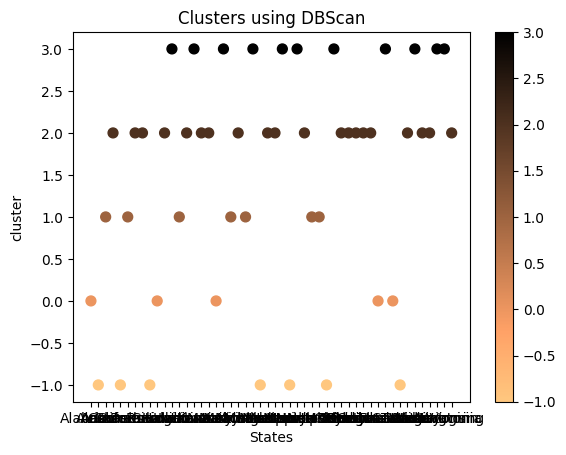

In [91]:
df.plot(x="States",y ="cluster",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan') 

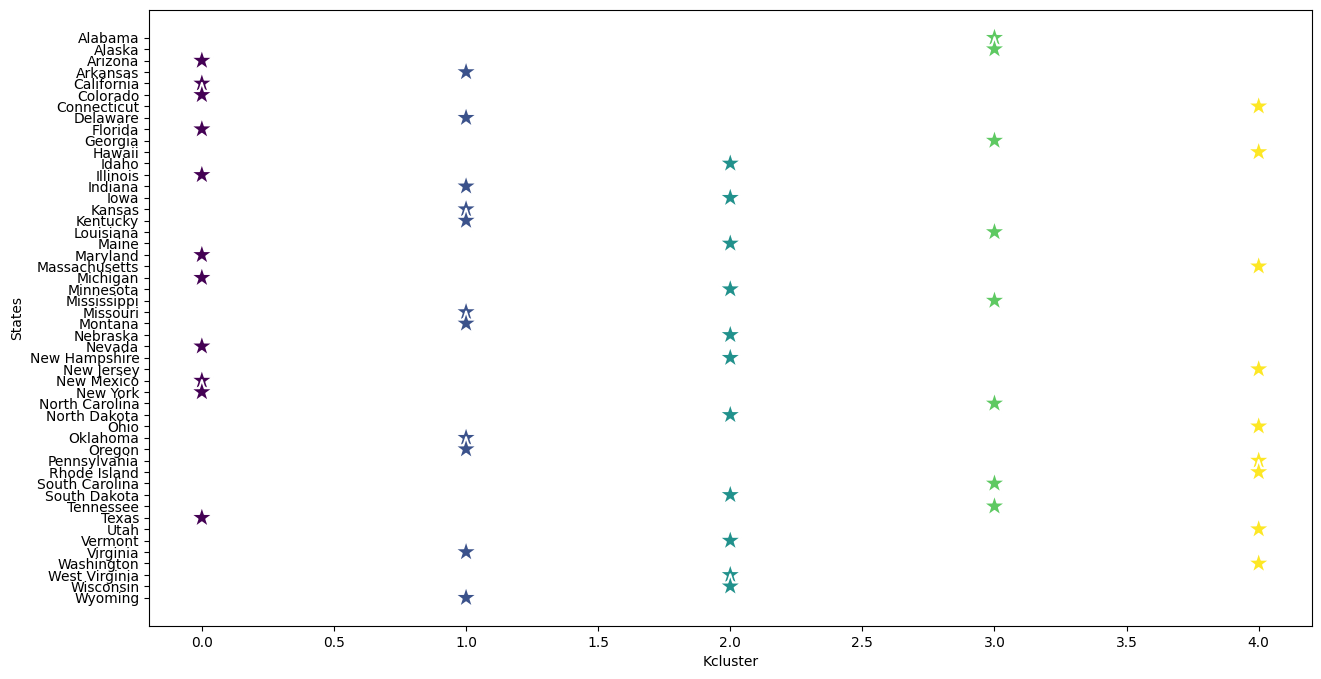

In [94]:
plt.figure(figsize=(15,8))
sn.scatterplot(x=df1['Kcluster'],y=df1['States'],c=clf.labels_,s=300,marker='*')
plt.show();

Text(0.5, 1.0, 'Clusters using KMeans')

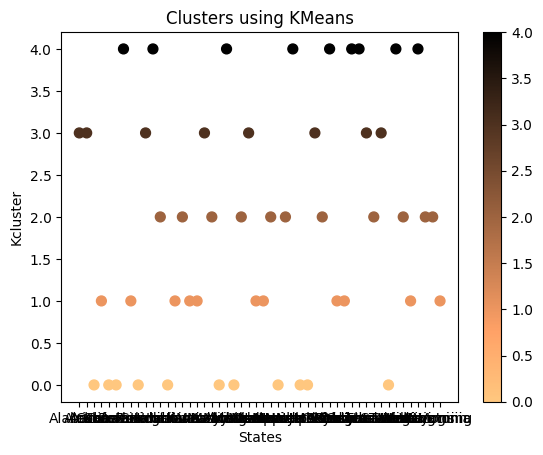

In [95]:
df1.plot(x="States",y ="Kcluster",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans') 

# HIERARCHAICAL Clustering

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_subset = pd.DataFrame(scaler.fit_transform(df1.iloc[:,1:7]))
crime_subset  

,0,1,2,3,4,5
0,1.255179,0.790787,-0.526195,-0.003451,-1.110531,0.814203
1,0.513019,1.118060,-1.224067,2.509424,-1.871169,0.814203
2,0.072361,1.493817,1.009122,1.053466,-0.349893,-1.328436
3,0.234708,0.233212,-1.084492,-0.186794,0.410744,-0.614223
4,0.281093,1.275635,1.776781,2.088814,-1.871169,-1.328436
5,0.025976,0.402909,0.869548,1.883901,-0.349893,-1.328436
6,-1.040880,-0.736484,0.799761,-1.092723,0.410744,1.528415
7,-0.437875,0.815030,0.450825,-0.585834,0.410744,-0.614223
8,1.765415,1.990786,1.009122,1.150530,-1.871169,-1.328436
9,2.229265,0.487757,-0.386621,0.492653,-1.110531,0.814203


# Dendrogram

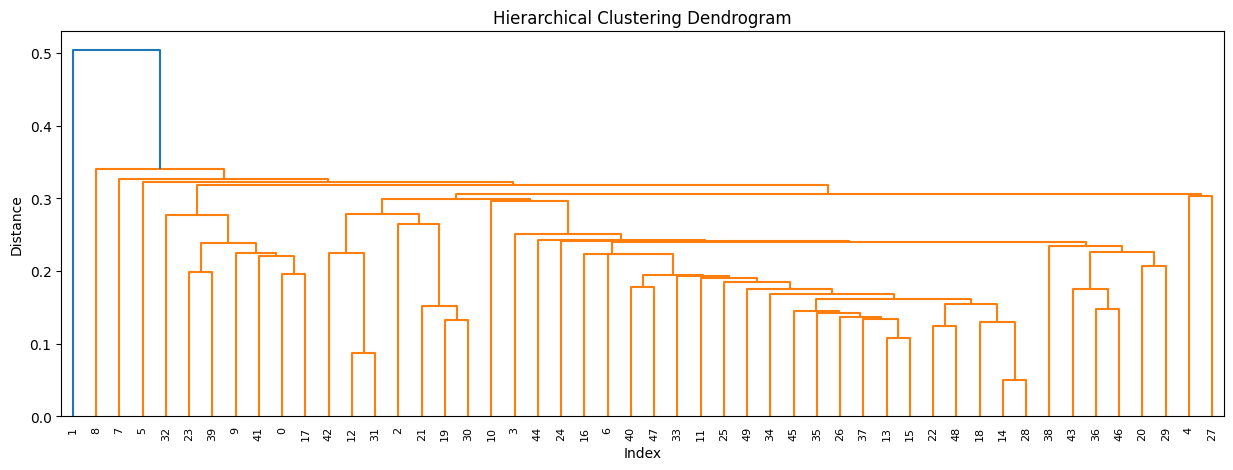

In [98]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
        z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

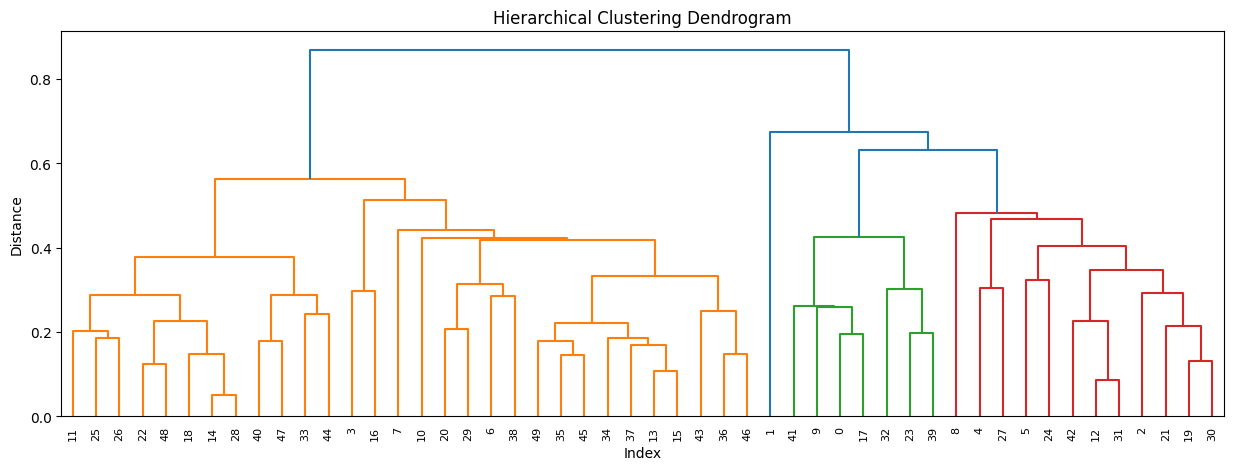

In [99]:
p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()   

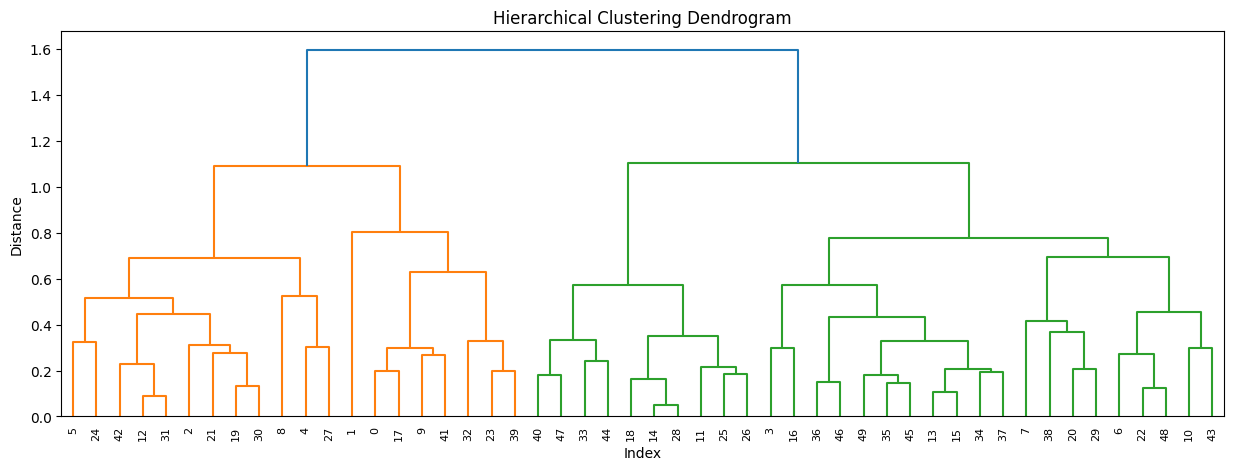

In [100]:
p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()    

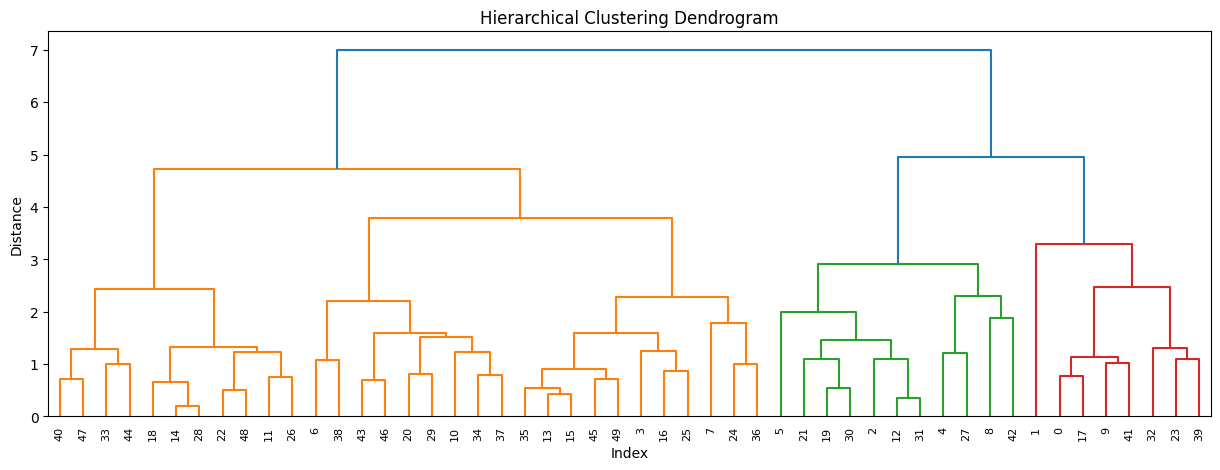

In [101]:
p = np.array(crime_subset) # converting into numpy array format 
z = linkage(crime_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [103]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
df1['clust']=cluster_labels # creating a  new column and assigning it to new column 
df1   

,States,Murder,Assault,UrbanPop,Rape,cluster,Kcluster,clust
0,Alabama,13.2,236,58,21.2,0,3,3
1,Alaska,10.0,263,48,44.5,-1,3,4
2,Arizona,8.1,294,80,31.0,1,0,1
3,Arkansas,8.8,190,50,19.5,2,1,0
4,California,9.0,276,91,40.6,-1,0,1
5,Colorado,7.9,204,78,38.7,1,0,1
6,Connecticut,3.3,110,77,11.1,2,4,0
7,Delaware,5.9,238,72,15.8,2,1,0
8,Florida,15.4,335,80,31.9,-1,0,1
9,Georgia,17.4,211,60,25.8,0,3,3


In [104]:
df1.iloc[:,1:].groupby(df1.clust).mean()

,Murder,Assault,UrbanPop,Rape,cluster,Kcluster,clust
clust,,,,,,,
0,5.715000,132.300000,70.800000,18.100000,2.100000,2.450000,0.0
1,10.883333,256.916667,78.333333,32.250000,0.416667,0.083333,1.0
2,3.180000,78.700000,49.300000,11.630000,2.900000,1.900000,2.0
3,14.671429,251.285714,54.285714,21.685714,-0.285714,3.000000,3.0
4,10.000000,263.000000,48.000000,44.500000,-1.000000,3.000000,4.0


In [105]:
data1 = df1[(df1.clust==0)]
data1  

,States,Murder,Assault,UrbanPop,Rape,cluster,Kcluster,clust
3,Arkansas,8.8,190,50,19.5,2,1,0
6,Connecticut,3.3,110,77,11.1,2,4,0
7,Delaware,5.9,238,72,15.8,2,1,0
10,Hawaii,5.3,46,83,20.2,2,4,0
13,Indiana,7.2,113,65,21.0,2,1,0
15,Kansas,6.0,115,66,18.0,2,1,0
16,Kentucky,9.7,109,52,16.3,2,1,0
20,Massachusetts,4.4,149,85,16.3,2,4,0
22,Minnesota,2.7,72,66,14.9,3,2,0
29,New Jersey,7.4,159,89,18.8,2,4,0


In [106]:
data1 = df1[(df1.clust==1)]
data1  

,States,Murder,Assault,UrbanPop,Rape,cluster,Kcluster,clust
2,Arizona,8.1,294,80,31.0,1,0,1
4,California,9.0,276,91,40.6,-1,0,1
5,Colorado,7.9,204,78,38.7,1,0,1
8,Florida,15.4,335,80,31.9,-1,0,1
12,Illinois,10.4,249,83,24.0,1,0,1
19,Maryland,11.3,300,67,27.8,1,0,1
21,Michigan,12.1,255,74,35.1,1,0,1
24,Missouri,9.0,178,70,28.2,2,1,1
27,Nevada,12.2,252,81,46.0,-1,0,1
30,New Mexico,11.4,285,70,32.1,1,0,1


In [107]:
data1 = df1[(df1.clust==2)]
data1  

,States,Murder,Assault,UrbanPop,Rape,cluster,Kcluster,clust
11,Idaho,2.6,120,54,14.2,3,2,2
14,Iowa,2.2,56,57,11.3,3,2,2
18,Maine,2.1,83,51,7.8,3,2,2
25,Montana,6.0,109,53,16.4,2,1,2
26,Nebraska,4.3,102,62,16.5,3,2,2
28,New Hampshire,2.1,57,56,9.5,3,2,2
33,North Dakota,0.8,45,44,7.3,3,2,2
40,South Dakota,3.8,86,45,12.8,3,2,2
44,Vermont,2.2,48,32,11.2,3,2,2
47,West Virginia,5.7,81,39,9.3,3,2,2


In [108]:
data1 = df1[(df1.clust==3)]
data1  

,States,Murder,Assault,UrbanPop,Rape,cluster,Kcluster,clust
0,Alabama,13.2,236,58,21.2,0,3,3
9,Georgia,17.4,211,60,25.8,0,3,3
17,Louisiana,15.4,249,66,22.2,0,3,3
23,Mississippi,16.1,259,44,17.1,-1,3,3
32,North Carolina,13.0,337,45,16.1,-1,3,3
39,South Carolina,14.4,279,48,22.5,0,3,3
41,Tennessee,13.2,188,59,26.9,0,3,3


In [109]:
data1 = df1[(df1.clust==4)]
data1  

,States,Murder,Assault,UrbanPop,Rape,cluster,Kcluster,clust
1,Alaska,10.0,263,48,44.5,-1,3,4


# In Hierarchical cluster, Complete method is suitable for clustering the crime data.   